# Using LSTM Model to Predict Stock Price

This notebook shows the training of an LSTM model trained to predict the stock price of various assets. 4 stocks have been selected. These stocks are Nvidia, Unilever, Tesla and the S&P500. These stocks have been selected because they vary in volatility. This will allow me to cross examine the LSTM's performance and explainability on different natured datasets.

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

## Getting Stock Data from Yahoo Finance 

Using Yahoo Finance Python package to import stock data of each stock in a 10 year time frame.

In [2]:
# Example Download last 10 years of Nvidia stock data 
ticker = "NVDA"
data = yf.download(ticker, start="2015-01-01", end="2025-10-10")

# Save to CSV
data.to_csv("NVDA_history.csv")

/tmp/ipykernel_13/3554060139.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-10-10")
[*********************100%***********************]  1 of 1 completed


In [3]:
ticker = "UL"
data = yf.download(ticker, start="2015-01-01", end="2025-10-10")

# Save to CSV
data.to_csv("UL_history.csv")

/tmp/ipykernel_13/1925197520.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-10-10")
[*********************100%***********************]  1 of 1 completed


In [4]:
ticker = "TSLA"
data = yf.download(ticker, start="2015-01-01", end ="2025-10-10")

# Save to CSV
data.to_csv("TSLA_history.csv")

/tmp/ipykernel_13/1278491995.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end ="2025-10-10")
[*********************100%***********************]  1 of 1 completed


In [5]:
ticker = "^GSPC"
data = yf.download(ticker, start="2015-01-01", end="2025-10-10")

# Save to CSV
data.to_csv("S&P500_history.csv")

/tmp/ipykernel_13/1581293613.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-10-10")
[*********************100%***********************]  1 of 1 completed


In [6]:
NVDA = pd.read_csv("/kaggle/working/NVDA_history.csv")
NVDA

,Price,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,0.4830383062362671,0.48663772264217214,0.4753595893775249,0.4830383062362671,113680000
3,2015-01-05,0.4748796224594116,0.4844780174360046,0.4727200014680458,0.4830382510381686,197952000
4,2015-01-06,0.4604821503162384,0.4760794982915834,0.46000223763807563,0.47559958561342064,197764000
...,...,...,...,...,...,...
2706,2025-10-03,187.6199951171875,190.36000061035156,185.3800048828125,189.19000244140625,137596900
2707,2025-10-06,185.5399932861328,187.22999572753906,183.3300018310547,185.5,157678100
2708,2025-10-07,185.0399932861328,189.05999755859375,184.0,186.22999572753906,140088000
2709,2025-10-08,189.11000061035156,189.60000610351562,186.5399932861328,186.57000732421875,130168900


In [7]:
UL = pd.read_csv("/kaggle/working/UL_history.csv")
UL

,Price,Close,High,Low,Open,Volume
0,Ticker,UL,UL,UL,UL,UL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,27.737749099731445,27.994450892060033,27.647555576685804,27.938949017832794,907700
3,2015-01-05,27.217395782470703,27.383906635071025,27.08557656550393,27.293713146304174,1347000
4,2015-01-06,27.078645706176758,27.425540998939876,26.974578706308453,27.238217223255667,1416000
...,...,...,...,...,...,...
2706,2025-10-03,58.54997634887695,58.95643555664592,58.48058115109357,58.54997634887695,2229900
2707,2025-10-06,58.07412338256836,58.28230898107795,57.93532920180722,58.07412338256836,2028600
2708,2025-10-07,58.10386276245117,58.42109903882836,57.73705902696906,57.83619394517891,2186600
2709,2025-10-08,58.133602142333984,58.500405875675675,58.07412270445705,58.500405875675675,1821300


In [8]:
TSLA = pd.read_csv("/kaggle/working/TSLA_history.csv")
TSLA

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,14.620667457580566,14.883333206176758,14.21733283996582,14.857999801635742,71466000
3,2015-01-05,14.005999565124512,14.433333396911621,13.810667037963867,14.303333282470703,80527500
4,2015-01-06,14.085332870483398,14.279999732971191,13.61400032043457,14.003999710083008,93928500
...,...,...,...,...,...,...
2706,2025-10-03,429.8299865722656,446.7699890136719,416.5799865722656,443.2900085449219,133188200
2707,2025-10-06,453.25,453.54998779296875,436.69000244140625,440.75,85324900
2708,2025-10-07,433.0899963378906,452.67999267578125,432.45001220703125,447.82000732421875,102296100
2709,2025-10-08,438.69000244140625,441.3299865722656,425.2300109863281,437.57000732421875,71192100


In [9]:
SP500 = pd.read_csv("/kaggle/working/S&P500_history.csv")
SP500

,Price,Close,High,Low,Open,Volume
0,Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,2058.199951171875,2072.360107421875,2046.0400390625,2058.89990234375,2708700000
3,2015-01-05,2020.5799560546875,2054.43994140625,2017.3399658203125,2054.43994140625,3799120000
4,2015-01-06,2002.6099853515625,2030.25,1992.43994140625,2022.1500244140625,4460110000
...,...,...,...,...,...,...
2706,2025-10-03,6715.7900390625,6750.8701171875,6705.669921875,6722.14013671875,5713110000
2707,2025-10-06,6740.27978515625,6749.52001953125,6717.77978515625,6733.85986328125,5604460000
2708,2025-10-07,6714.58984375,6754.490234375,6699.9599609375,6746.14013671875,5546150000
2709,2025-10-08,6753.72021484375,6755.64013671875,6718.08984375,6723.8701171875,5383130000


## Combining Datasets

Next step is to combine datasets and add tickers as a column. Each dataset has 2 rows at the top that need to be removed.

*Note: ^GSPC is S&P500 ticker*

In [10]:

import pandas as pd

def clean_yf_df(df: pd.DataFrame, fallback_ticker: str = None) -> pd.DataFrame:
    df = df.copy()

    # Expected final column names (from your sample)
    final_cols = ["Date", "Close", "High", "Low", "Open", "Volume"]

    # Try to detect ticker from row 0:
    # Row 0 looks like: ['Ticker', '^GSPC', '^GSPC', '^GSPC', '^GSPC', '^GSPC']
    ticker = None
    if df.shape[0] >= 1:
        row0 = df.iloc[0].tolist()
        # Ignore the first cell ('Ticker'), look for the first non-null/non-'Ticker' value
        candidates = [x for x in row0[1:] if pd.notna(x) and str(x).lower() != "ticker"]
        if candidates:
            ticker = str(candidates[0]).strip()

    if fallback_ticker and not ticker:
        ticker = fallback_ticker

    # Drop the first two metadata rows
    df = df.iloc[2:].reset_index(drop=True)

    # Force columns to the expected names
    # Your sample shows 6 columns after 'Date'; make sure they match
    df.columns = final_cols

    # Type conversions
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

    numeric_cols = ["Close", "High", "Low", "Open", "Volume"]
    for col in numeric_cols:
        # Volume may be large integers; others are floats
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Add Ticker column
    df["Ticker"] = ticker

    # Optional: drop rows with missing Date
    df = df.dropna(subset=["Date"]).reset_index(drop=True)

    return df


def combine_yf_dfs(**dfs) -> pd.DataFrame:
    """
    Combine multiple yfinance-like DataFrames passed as keyword arguments.
    The keyword name is used as a fallback ticker if the ticker cannot be parsed.

    Example:
        combined = combine_yf_dfs(NVDA=NVDA, UL=UL, SP500=SP500, TSLA=TSLA)
    """
    cleaned = []
    for name, df in dfs.items():
        cleaned.append(clean_yf_df(df, fallback_ticker=name))
    combined = pd.concat(cleaned, ignore_index=True)

    # Optional: sort by Ticker then Date
    combined = combined.sort_values(["Ticker", "Date"]).reset_index(drop=True)
    return combined


# ---- Usage with your DataFrames ----
# Assuming you already have: NVDA, UL, SP500, TSLA

combined_df = combine_yf_dfs(NVDA=NVDA, UL=UL, SP500=SP500, TSLA=TSLA)

print(combined_df.head())
print(combined_df["Ticker"].unique())


        Date     Close      High       Low      Open     Volume Ticker
0 2015-01-02  0.483038  0.486638  0.475360  0.483038  113680000   NVDA
1 2015-01-05  0.474880  0.484478  0.472720  0.483038  197952000   NVDA
2 2015-01-06  0.460482  0.476079  0.460002  0.475600  197764000   NVDA
3 2015-01-07  0.459282  0.467921  0.457843  0.463842  321808000   NVDA
4 2015-01-08  0.476560  0.479439  0.464322  0.464562  283780000   NVDA
['NVDA' 'TSLA' 'UL' '^GSPC']


In [11]:
combined_df.tail()

,Date,Close,High,Low,Open,Volume,Ticker
10831,2025-10-03,6715.790039,6750.870117,6705.669922,6722.140137,5713110000,^GSPC
10832,2025-10-06,6740.279785,6749.520020,6717.779785,6733.859863,5604460000,^GSPC
10833,2025-10-07,6714.589844,6754.490234,6699.959961,6746.140137,5546150000,^GSPC
10834,2025-10-08,6753.720215,6755.640137,6718.089844,6723.870117,5383130000,^GSPC
10835,2025-10-09,6735.109863,6764.580078,6716.169922,6760.500000,5385020000,^GSPC


In [12]:
stock_prices = combined_df

## Data Cleaning

In [13]:
stock_prices.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

## Exploratory Data Analysis (EDA)

In [14]:
stock_prices.groupby("Ticker").describe()

Date                                                      \
       count                           mean                  min   
Ticker                                                             
NVDA    2709  2020-05-20 02:56:28.704318976  2015-01-02 00:00:00   
TSLA    2709  2020-05-20 02:56:28.704318976  2015-01-02 00:00:00   
UL      2709  2020-05-20 02:56:28.704318976  2015-01-02 00:00:00   
^GSPC   2709  2020-05-20 02:56:28.704318976  2015-01-02 00:00:00   

                                                                       \
                        25%                  50%                  75%   
Ticker                                                                  
NVDA    2017-09-11 00:00:00  2020-05-20 00:00:00  2023-01-27 00:00:00   
TSLA    2017-09-11 00:00:00  2020-05-20 00:00:00  2023-01-27 00:00:00   
UL      2017-09-11 00:00:00  2020-05-20 00:00:00  2023-01-27 00:00:00   
^GSPC   2017-09-11 00:00:00  2020-05-20 00:00:00  2023-01-27 00:00:00   

                                   Close               ...         Open  \
                        max  std   count         mean  ...          max   
Ticker                                                 ...                
NVDA    2025-10-09 00:00:00  NaN  2709.0    29.594954  ...   192.229996   
TSLA    2025-10-09 00:00:00  NaN  2709.0   131.047515  ...   475.899994   
UL      2025-10-09 00:00:00  NaN  2709.0    44.000837  ...    64.081787   
^GSPC   2025-10-09 00:00:00  NaN  2709.0  3548.006123  ...  6760.500000   

                     Volume                                          \
                std   count          mean         min           25%   
Ticker                                                                
NVDA      45.094987  2709.0  4.507151e+08  52448000.0  2.869520e+08   
TSLA     124.332028  2709.0  1.116293e+08  10620000.0  6.778800e+07   
UL         8.363708  2709.0  1.824715e+06    320000.0  9.655000e+05   
^GSPC   1257.255522  2709.0  4.085477e+09         0.0  3.456390e+09   

                                                                
                 50%           75%           max           std  
Ticker                                                          
NVDA    3.994560e+08  5.445140e+08  3.692928e+09  2.533293e+08  
TSLA    9.318600e+07  1.289611e+08  9.140820e+08  7.207031e+07  
UL      1.518700e+06  2.268000e+06  3.801040e+07  1.639423e+06  
^GSPC   3.878750e+09  4.486130e+09  9.976520e+09  9.980615e+08  

[4 rows x 48 columns]

## Closing Price of Stocks

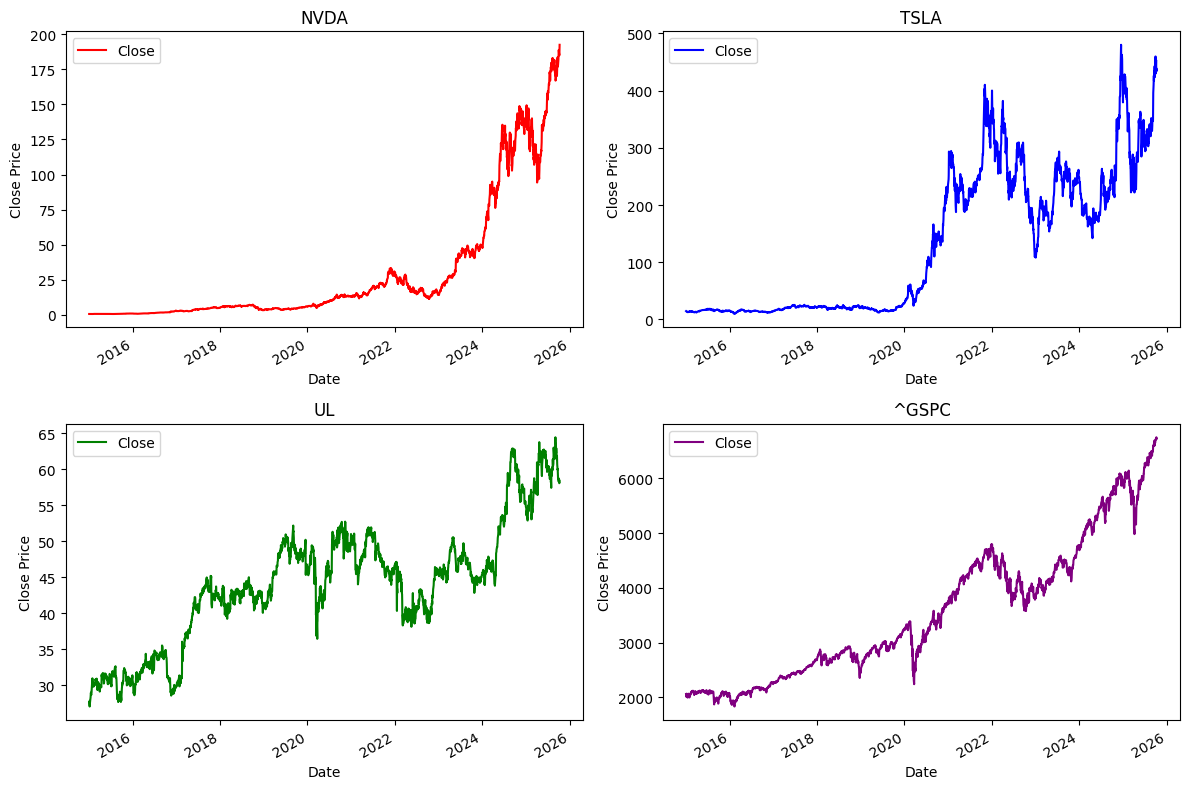

In [15]:
# Historical view of Stock Closing Price

tickers = combined_df["Ticker"].unique()
colorlist = ['Red', 'Blue', 'Green', 'Purple']

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(tickers, 1):
    plt.subplot(2, 2, i)
    data = combined_df[combined_df["Ticker"] == ticker]
    data.plot(x="Date", y="Close", color=colorlist[i-1], ax=plt.gca())
    plt.ylabel('Close Price')
    plt.xlabel('Date')
    plt.title(f"{ticker}")

plt.tight_layout()
plt.show()

## Closing and Open Price

Using a candle stick graph to show changes in open and close price. Doing weekly candles because dayly are too small to see.

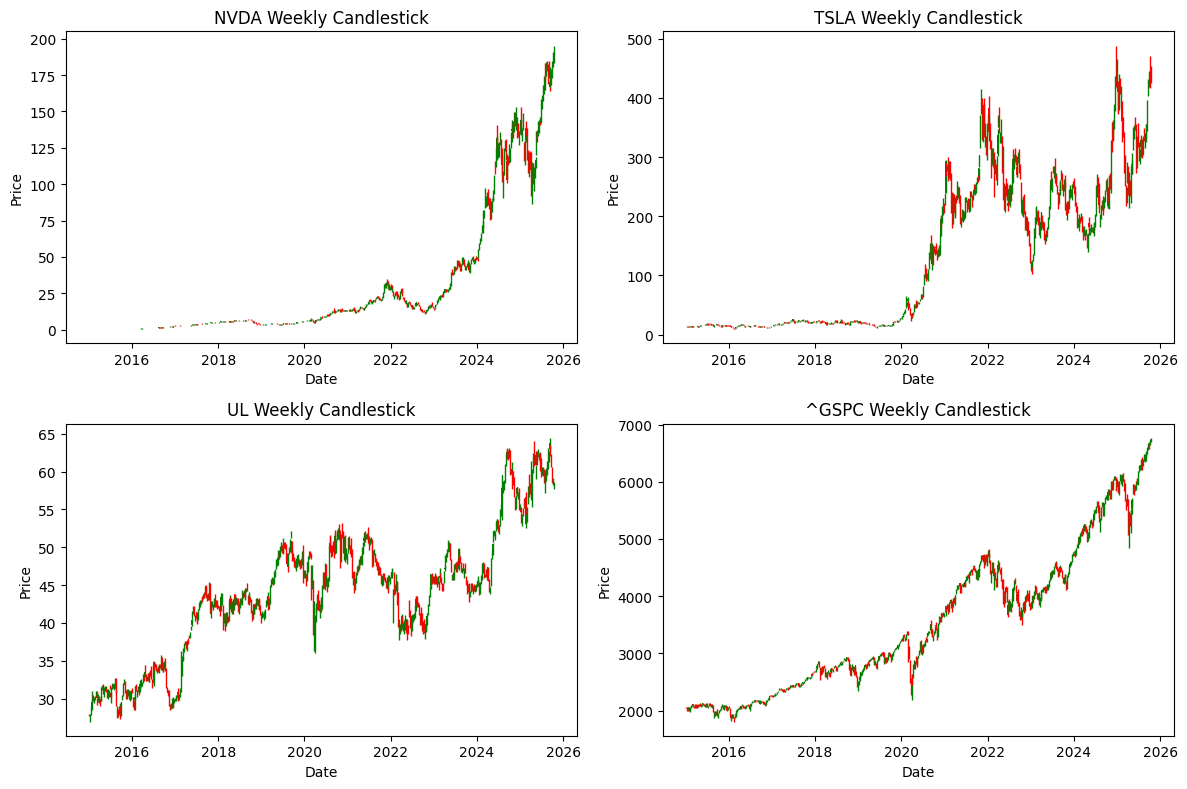

In [16]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(tickers, 1):
    plt.subplot(2, 2, i)
    data = combined_df[combined_df["Ticker"] == ticker].copy()
    data = data.set_index("Date")

    # Resample to weekly OHLC
    weekly = data.resample("W").agg({
        "Open": "first",
        "High": "max",
        "Low": "min",
        "Close": "last"
    }).dropna()

    # Colours
    colors = ["green" if c > o else "red" for o, c in zip(weekly["Open"], weekly["Close"])]

    # Plot wicks (high - low)
    plt.vlines(weekly.index, weekly["Low"], weekly["High"], color=colors, linewidth=1)

    # Plot candle bodies (open - close)
    plt.bar(weekly.index, weekly["Close"] - weekly["Open"], bottom=weekly["Open"], color=colors, width=3)

    plt.title(f"{ticker} Weekly Candlestick")
    plt.ylabel("Price")
    plt.xlabel("Date")

plt.tight_layout()
plt.show()


## Volume of Sales

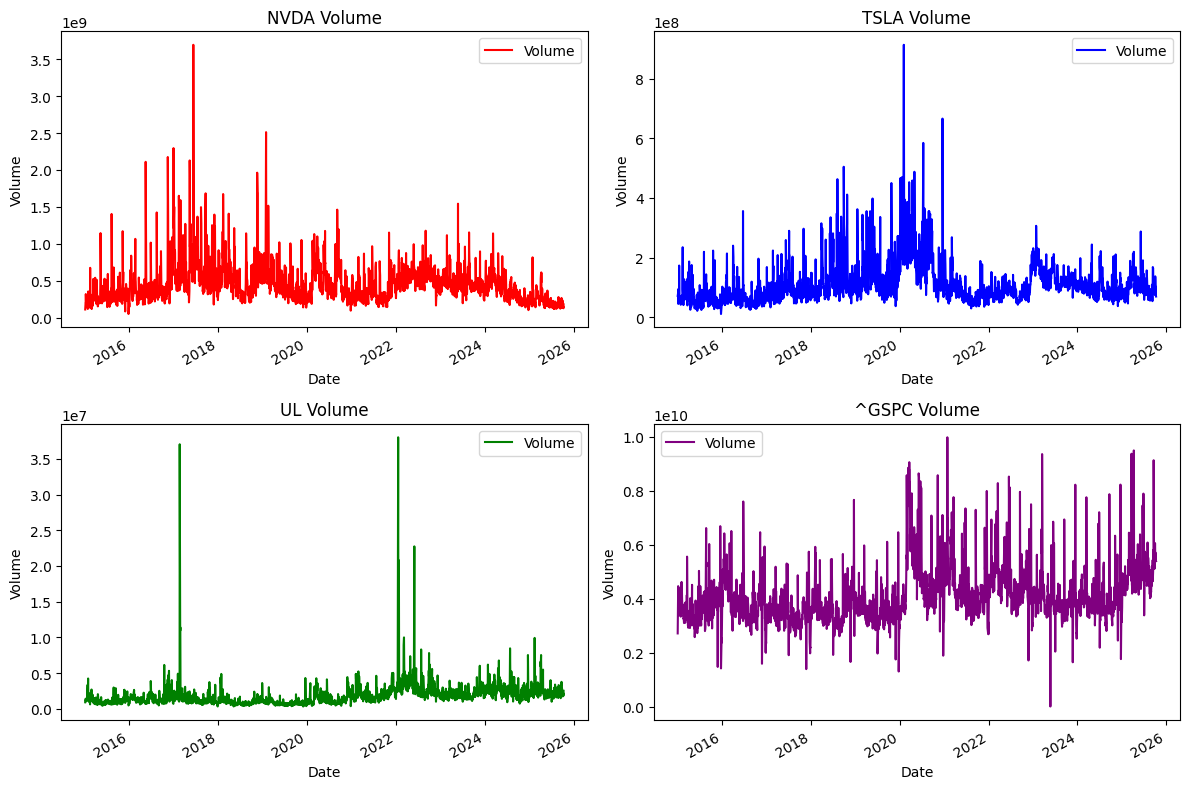

In [17]:
# Historial View of Sales Volumes 

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(tickers, 1):
    plt.subplot(2, 2, i)
    data = combined_df[combined_df["Ticker"] == ticker]
    data.plot(x="Date", y="Volume", color=colorlist[i-1], ax=plt.gca())
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"{ticker} Volume")

plt.tight_layout()